## Recode all examples;

In [8]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [12]:
img_gray = cv2.imread('./lenna1.jpg')
# print(img_gray)
cv2.imshow('lenna1',img_gray)
key = cv2.waitKey()
# 当键盘按键为ESC(对应的键值为27)，关闭图像
if key == 27:
    cv2.destroyAllWindows()

In [5]:
# to show gray image to show matrix
print(img_gray)

In [8]:
# to show image data type
print(img_gray.dtype)

uint8


In [13]:
# to show image data type
print(img_gray.shape) # h,w,c

(256, 256, 3)


In [2]:
import cv2

In [6]:
img = cv2.imread('./lenna1.jpg')
cv2.imshow('lenna',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
# to show color image to show channels
print(img)
print(img.shape) # h,w,c

# image crop
img_crop = img[0:100,0:200]
cv2.imshow('img_crop',img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    
# color split
B,G,R = cv2.split(img)
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

[[[120 137 234]
  [120 137 234]
  [120 137 234]
  ...
  [146 145 243]
  [144 139 238]
  [120 116 212]]

 [[119 136 233]
  [119 136 233]
  [119 136 233]
  ...
  [156 152 248]
  [150 143 240]
  [125 119 214]]

 [[114 133 230]
  [115 134 231]
  [115 134 231]
  ...
  [137 129 222]
  [123 113 206]
  [ 98  87 179]]

 ...

 [[ 60  26  91]
  [ 69  35 100]
  [ 61  27  97]
  ...
  [ 71  50 135]
  [ 78  62 146]
  [ 85  70 154]]

 [[ 59  25  90]
  [ 67  33  98]
  [ 59  25  95]
  ...
  [ 81  62 147]
  [ 86  70 157]
  [ 89  76 162]]

 [[ 54  20  85]
  [ 62  28  93]
  [ 55  21  91]
  ...
  [ 89  73 157]
  [ 91  77 165]
  [ 91  79 167]]]
(256, 256, 3)


In [12]:
# change color
def random_light_color(img):
    # brightness
    B,G,R = cv2.split(img)
    
    b_rand = random.randint(-50,50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim].astype(img.dtype))
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
    
    g_rand = random.randint(-50,50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim].astype(img.dtype))
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
        
    r_rand = random.randint(-50,50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim].astype(img.dtype))
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
        
    img_merge = cv2.merge((B,G,R))
    
    return img_merge

img_random_color = random_light_color(img)
cv2.imshow('img_random_color', img_random_color)
key =cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    
# ###################################################

In [19]:
# gamma correction
img_dark = cv2.imread('./lenna2.jpg')
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

    
def adjust_gamma(image, gamma = 1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0) ** invGamma) *255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark,table)

img_brighter = adjust_gamma(img_dark,2)
cv2.imshow('img_dark',img_dark)
cv2.imshow('img_brighter',img_brighter)
key =cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
###################################

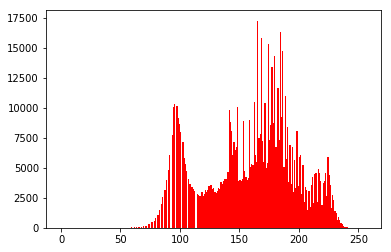

In [20]:
# histogram
img_small_brighter = cv2.resize(img_brighter,(int(img_brighter.shape[0]*0.5),int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(),256,[0,256],color='r')
img_yuv = cv2.cvtColor(img_small_brighter,cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
cv2.imshow('Color input image',img_small_brighter)
cv2.imshow('Histogram equalized',img_output)
key =cv2.waitKey(0)

In [27]:
# ##################################################
# rotation
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),30,1) # center,angle,scale
img_rotate = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('rotated lenna',img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
    
print(M)

# set M[0][2] = M[1][2]=0
print(M)
img_rotate2 = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('rotated lenna2',img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
# explain translation

# scale+rotation+translation =similarity transform
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),30,0.5) # center,angle,scale
img_rotate = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('rotated lenna',img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[  0.8660254    0.5        -46.85125168]
 [ -0.5          0.8660254   81.14874832]]
[[  0.8660254    0.5        -46.85125168]
 [ -0.5          0.8660254   81.14874832]]
[[  0.4330127    0.25        40.57437416]
 [ -0.25         0.4330127  104.57437416]]


In [30]:
# ################################################################
# Affine Transform
rows,cols,ch =img.shape
pts1 = np.float32([[0,0],[cols-1,0],[0,rows-1]])
pts2 = np.float32([[cols * 0.2,rows * 0.1],[cols * 0.9,rows * 0.2],[cols*0.1,rows*0.9]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('affine lenna',dst)
key =cv2.waitKey(0)
if key==27:
    cv2.destroyAllWindows()
###################################################################

In [ ]:
###########################################
# perspective transform
def random_warp(img, row, col):
    height,width,channels = img.shape
    
    # warp
    random_margin = 60
    x1 = random.randint(-random_margin,random_margin)
    y1 = random.randint(-random_margin,random_margin)
    x2 = random.randint(width-random_margin-1,width-1)
    y2 = random.randint(-random_margin,random_margin)
    x3 = random.randint(width - random_margin-1,width-1)
    y3 = random.randint(height -random_margin-1,height-1)
    x4 = random.randint(-random_margin,random_margin)
    y4 = random.randint(height-random_margin-1,height-1)
    
    dx1 = random.randint(-random_margin,random_margin)
    dy1 = random.randint(-random_margin,random_margin)
    dx2 = random.randint(width - random_margin -1,width-1)
    dy2 = random.randint(-random_margin,random_margin)
    dx3 = random.randint(width - random_margin-1,width-1)
    dy3 = random.randint(height - random_margin-1,height-1)
    dx4 = random.randint(-random_margin,random_margin)
    dy4 = random.randint(height - random_margin-1,height-1)
    
    pts1 = np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
    pts2 = np.float32([[dx1,dy1],[dx2,dy2],[dx3,dy3],[dx4,dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1,pts2)
    img_warp = cv2.warpPerspective(img,M_warp,(width,height))
    return M_warp,img_warp
M_warp,img_warp = random_warp(img,img.shape[0],img.shape[1])
cv2.imshow('lenna_war',img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()